In [ ]:
#!pip install pandas
#!pip install tensorflow==2.10.1
#!pip install numpy
#!pip install matplotlib
#!pip install seaborn
#!pip install scipy

In [6]:
import pandas as pd
import numpy as np
import os
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [7]:
from dotenv import load_dotenv
load_dotenv()

True

In [8]:
TRAIN_DATA_DIR = os.environ.get('TRAIN_DATA_DIR')
VALID_DATA_DIR = os.environ.get('VALID_DATA_DIR')
TEST_DATA_DIR = os.environ.get('TEST_DATA_DIR')

# Load the training data
train_ds = image_dataset_from_directory(
    TRAIN_DATA_DIR,
    label_mode='categorical',
    #class_names=['Cavity', 'Fillings', 'Impacted Tooth', 'Implant', 'Normal'],
    color_mode='grayscale',
    batch_size=32,
    image_size=(64, 64)
)

# Load the validation data
val_ds = image_dataset_from_directory(
    '/home/enric/code/tdurova/starsmiles/raw_data/Dental_Radiography/valid',
    label_mode='categorical',
    #class_names=['Cavity', 'Fillings', 'Impacted Tooth', 'Implant', 'Normal'],
    color_mode='grayscale',
    batch_size=32,
    image_size=(64, 64)
)

# Load the test data
test_ds = image_dataset_from_directory(
    '/home/enric/code/tdurova/starsmiles/raw_data/Dental_Radiography/test',
    label_mode='categorical',
    #class_names=['Cavity', 'Fillings', 'Impacted Tooth', 'Implant', 'Normal'],
    color_mode='grayscale',
    batch_size=32,
    image_size=(64, 64)
)


Found 25136 files belonging to 5 classes.
Found 2812 files belonging to 5 classes.
Found 1649 files belonging to 5 classes.


In [9]:
class_names = train_ds.class_names
class_names

['Cavity', 'Fillings', 'Impacted Tooth', 'Implant', 'Normal']

IndexError: list index out of range

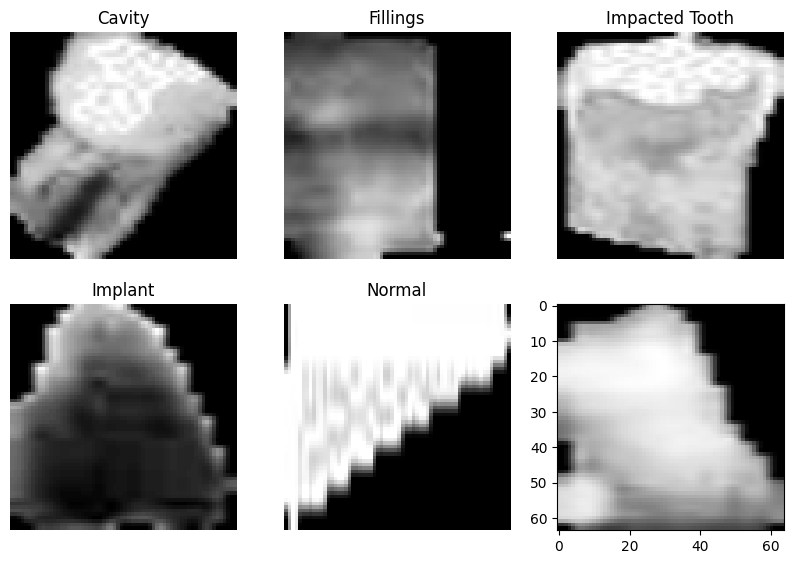

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"), cmap='gray')
    plt.title(class_names[i])
    plt.axis("off")

In [11]:
for i, element in enumerate(train_ds.as_numpy_iterator()):
    if i<1:
        print(element[0])
        print(element[1])
    else:
        break

[[[[  0.]
   [  0.]
   [  0.]
   ...
   [  0.]
   [  0.]
   [  0.]]

  [[  0.]
   [  0.]
   [  0.]
   ...
   [  0.]
   [  0.]
   [  0.]]

  [[  0.]
   [  0.]
   [  0.]
   ...
   [  0.]
   [  0.]
   [  0.]]

  ...

  [[  0.]
   [  0.]
   [  0.]
   ...
   [  0.]
   [  0.]
   [  0.]]

  [[  0.]
   [  0.]
   [  0.]
   ...
   [  0.]
   [  0.]
   [  0.]]

  [[  0.]
   [  0.]
   [  0.]
   ...
   [  0.]
   [  0.]
   [  0.]]]


 [[[  0.]
   [  0.]
   [  0.]
   ...
   [  0.]
   [  0.]
   [  0.]]

  [[  0.]
   [  0.]
   [  0.]
   ...
   [  0.]
   [  0.]
   [  0.]]

  [[  0.]
   [  0.]
   [  0.]
   ...
   [  0.]
   [  0.]
   [  0.]]

  ...

  [[  1.]
   [  1.]
   [100.]
   ...
   [255.]
   [167.]
   [  1.]]

  [[  0.]
   [  0.]
   [ 87.]
   ...
   [255.]
   [160.]
   [  0.]]

  [[  0.]
   [  0.]
   [ 81.]
   ...
   [255.]
   [157.]
   [  0.]]]


 [[[  0.]
   [  0.]
   [  0.]
   ...
   [  0.]
   [  0.]
   [  0.]]

  [[  0.]
   [  0.]
   [  0.]
   ...
   [  0.]
   [  0.]
   [  0.]]

  [[  0.]
   [  

In [12]:
train_ds_norm = train_ds.map(lambda x, y: (x/255, y))
image_batch, labels_batch = next(iter(train_ds_norm))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.4509804


In [13]:
test_ds_norm = test_ds.map(lambda x, y: (x/255, y))
image_batch, labels_batch = next(iter(test_ds_norm))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.9843137


In [14]:
val_ds_norm = val_ds.map(lambda x, y: (x/255, y))
image_batch, labels_batch = next(iter(val_ds_norm))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [15]:
#train_ds_norm.save('/home/enric/code/tdurova/starsmiles/raw_data/Dental_Radiography/train')
#test_ds_norm.save('/home/enric/code/tdurova/starsmiles/raw_data/Dental_Radiography/test')
#val_ds_norm.save('/home/enric/code/tdurova/starsmiles/raw_data/Dental_Radiography/valid')

In [16]:
#import tensorflow as tf

#new = tf.data.Dataset.load('/home/enric/code/tdurova/starsmiles/raw_data/Dental_Radiography/valid')
#new

In [17]:
#for i, element in enumerate(new.as_numpy_iterator()):
#    if i<1:
#        print(element[0])
#        print(element[1])
#    else:
#        break

## evaluate model

In [18]:
from tensorflow.keras.models import load_model

model = load_model('/home/enric/code/tdurova/starsmiles/models/model.keras')

In [19]:
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers

adam = optimizers.Adam(learning_rate = 0.001)
model.compile(loss='categorical_crossentropy',
              optimizer= adam,
              metrics=['accuracy'])


In [20]:
metrics = model.evaluate(
        test_ds,
        return_dict=True
    )

loss = metrics["loss"]
accuracy = metrics["accuracy"]

print(loss, accuracy)

52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9063 - loss: 0.2657
0.2776462435722351 0.9066100716590881


## Process and prediction

In [33]:
#!pip install Pillow

input_image = input('Enter path to image: ')

In [34]:
from tensorflow.keras.utils import img_to_array
from PIL import Image

image = Image.open(input_image)
img = img_to_array(image)
img.shape[2]

3

In [35]:
img.shape[:2]

(64, 64)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..228.0].


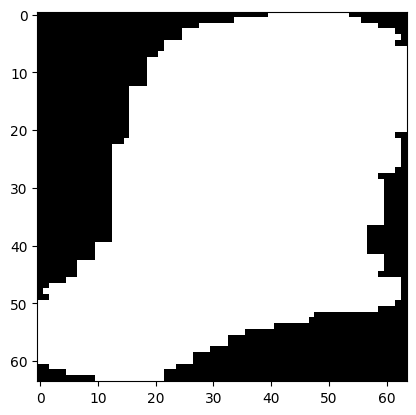

In [36]:
from tensorflow.keras.preprocessing.image import smart_resize

resized_im = smart_resize(img, (64,64))
plt.imshow(resized_im)

In [37]:
type(resized_im)

numpy.ndarray

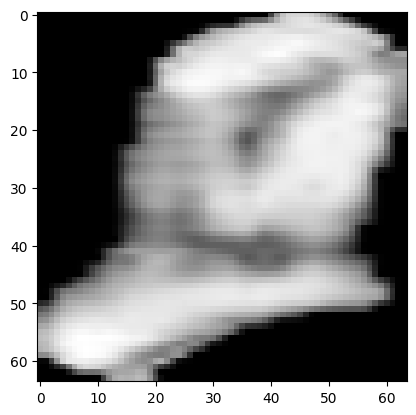

In [38]:
from tensorflow.image import rgb_to_grayscale

grey_res_im = rgb_to_grayscale(resized_im)
plt.imshow(grey_res_im, cmap='gray')

In [39]:
print(grey_res_im.shape, type(grey_res_im))

(64, 64, 1) <class 'tensorflow.python.framework.ops.EagerTensor'>


In [40]:
p = np.expand_dims(grey_res_im, axis=0)

pred = model.predict(p)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[2.2937914e-02, 7.7723336e-01, 6.9595402e-04, 4.3605507e-04,
        1.9869682e-01]], dtype=float32)

In [41]:
p.shape

(1, 64, 64, 1)

In [42]:
class_names= train_ds.class_names
class_names

['Cavity', 'Fillings', 'Impacted Tooth', 'Implant', 'Normal']

In [43]:
threshold = 0.5
for i in range(len(class_names)):
    print(f'Probability of {class_names[i]}: {round(100*pred[0,i],2)}%')

    if pred[0,i]>threshold:
        threshold=pred[0,i]
        prediction = class_names[i]

print(f'Prediction is: {prediction}')


Probability of Cavity: 2.29%
Probability of Fillings: 77.72%
Probability of Impacted Tooth: 0.07%
Probability of Implant: 0.04%
Probability of Normal: 19.87%
Prediction is: Fillings


In [32]:
prediction

'Normal'